In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [2]:
#Data

home = '/tudelft.net/staff-umbrella/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/own_resolution'


LS3MIP_Amon_CESM2 = xr.open_dataset(home + '/evspsbl_Amon_CESM2_land-hist_r1i1p1f1_200101-201212.nc' , engine = 'netcdf4')
LS3MIP_Amon_CMCC_ESM2 = xr.open_dataset(home + '/evspsbl_Amon_CMCC-ESM2_land-hist_r1i1p1f1_200101-201212.nc'     , engine = 'netcdf4')
LS3MIP_Amon_ESM_1_1 = xr.open_dataset(home + '/evspsbl_Amon_E3SM-1-1_land-hist_r1i1p11f1_200101-201212.nc' , engine = 'netcdf4')
LS3MIP_Amon_EC_Earth3 = xr.open_dataset(home + '/evspsbl_Amon_EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212.nc' , engine = 'netcdf4')
LS3MIP_Amon_GC31 = xr.open_dataset(home + '/evspsbl_Amon_HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212.nc' , engine = 'netcdf4')
LS3MIP_Amon_CM6A = xr.open_dataset(home + '/evspsbl_Amon_IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212.nc' , engine = 'netcdf4')
LS3MIP_Amon_MIROC6 = xr.open_dataset(home + '/evspsbl_Amon_MIROC6_land-hist_r1i1p1f1_200101-201212.nc' , engine = 'netcdf4')
LS3MIP_Amon_UKESM1 = xr.open_dataset(home + '/evspsbl_Amon_UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212.nc' , engine = 'netcdf4')

"""Data"""

home = '/tudelft.net/staff-umbrella/rootzone/Benchmark_evaporation_products'

DOLCE_v3_monthly = xr.open_dataset(home + '/DOLCE_v3/DOLCE_v3_2001-2012.nc' , engine = 'netcdf4')
FBP_monthly = xr.open_dataset(home + '/FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_FG.nc' , engine = 'netcdf4')

LM1_monthly = LS3MIP_Amon_CESM2
LM2_monthly = LS3MIP_Amon_CMCC_ESM2
LM3_monthly = LS3MIP_Amon_ESM_1_1
LM4_monthly = LS3MIP_Amon_EC_Earth3
LM5_monthly = LS3MIP_Amon_GC31
LM6_monthly = LS3MIP_Amon_CM6A
LM7_monthly = LS3MIP_Amon_MIROC6
LM8_monthly = LS3MIP_Amon_UKESM1

DATA_p = {'LS3MIP_Amon_CESM2':LM1_monthly , 'LM2':LM2_monthly , 'LM3':LM3_monthly , 'LM4':LM4_monthly , 'LM5':LM5_monthly , 'LM6':LM6_monthly ,  'LM7':LM7_monthly , 'LM8':LM8_monthly}
DATA = [LM1_monthly , LM2_monthly , LM3_monthly , LM4_monthly , LM5_monthly ,LM6_monthly ,LM7_monthly ,LM8_monthly]
Label = ['CESM2' , 'CMCC_ESM2' , 'ESM-1-1' , 'EC-Earth3-veg' , 'HadGEM3-GC31-LL' ,'IPSL-CM6A-LR' ,'MIROC6' ,'UKESM1-0-LL']
number_d = np.arange(1 , 9 , 1)

In [3]:
"""Dimensions"""

for i ,data in zip(number_d, DATA):
    #Characteristics
    print('-----'* 10)
    print(f'LM{i}')
    print('-----'* 10)
    print(data.dims)
    print(data.coords)
    print()

--------------------------------------------------
LM1
--------------------------------------------------
Frozen({'time': 144, 'bnds': 2, 'lon': 288, 'lat': 192})
Coordinates:
  * time     (time) object 2001-01-15 12:00:00 ... 2012-12-15 12:00:00
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0

--------------------------------------------------
LM2
--------------------------------------------------
Frozen({'time': 144, 'bnds': 2, 'lon': 288, 'lat': 192})
Coordinates:
  * time     (time) object 2001-01-16 12:00:00 ... 2012-12-16 12:00:00
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0

--------------------------------------------------
LM3
--------------------------------------------------
Frozen({'time': 144, 'bnds': 2, 'lon': 720, 'lat': 360})
Coordinates:
  * time    

In [4]:
"""Parameters"""

L_60 = [32  , 32 ,  60 , 42 , 24 , 24  , 21  , 24]
L_eq = [96  , 96 , 180 , 126 ,72 , 72  , 63  , 72]

"""Converting to mm/d"""
t_day = 86400 #seconds
factor = t_day

#NEW

"""Weighting"""

phi = np.deg2rad(LM1_monthly.lat)
weights = np.cos(phi)
LM1_monthly_weighted = weights * LM1_monthly.evspsbl

"""Removing Antarctica"""

LM1_monthly_weighted_Ant = LM1_monthly_weighted[L_60[0]: , : , :] * factor

"""-60 until 0 degrees"""

LM1_monthly_weighted_SH  = LM1_monthly_weighted[L_60[0]:L_eq[0] , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM2_monthly.lat)
weights = np.cos(phi)
LM2_monthly_weighted = weights * LM2_monthly.evspsbl

"""Removing Antarctica"""

LM2_monthly_weighted_Ant = LM2_monthly_weighted[L_60[1]: , : , :] * factor

"""-60 until 0 degrees"""

LM2_monthly_weighted_SH  = LM2_monthly_weighted[L_60[1]:L_eq[1] , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM3_monthly.lat)
weights = np.cos(phi)
LM3_monthly_weighted = weights * LM3_monthly.evspsbl

"""Removing Antarctica"""

LM3_monthly_weighted_Ant = LM3_monthly_weighted[L_60[2]: , : , :] * factor

"""-60 until 0 degrees"""

LM3_monthly_weighted_SH  = LM3_monthly_weighted[L_60[2]:L_eq[2] , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM4_monthly.lat)
weights = np.cos(phi)
LM4_monthly_weighted = weights * LM4_monthly.evspsbl

"""Removing Antarctica"""

LM4_monthly_weighted_Ant = LM4_monthly_weighted[L_60[3]: , : , :] * factor

"""-60 until 0 degrees"""

LM4_monthly_weighted_SH  = LM4_monthly_weighted[L_60[3]:L_eq[3] , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM5_monthly.lat)
weights = np.cos(phi)
LM5_monthly_weighted = weights * LM5_monthly.evspsbl

"""Removing Antarctica"""

LM5_monthly_weighted_Ant = LM5_monthly_weighted[L_60[4]: , : , :] * factor

"""-60 until 0 degrees"""

LM5_monthly_weighted_SH  = LM5_monthly_weighted[L_60[4]:L_eq[4] , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM6_monthly.lat)
weights = np.cos(phi)
LM6_monthly_weighted = weights * LM6_monthly.evspsbl

"""Removing Antarctica"""

LM6_monthly_weighted_Ant = LM6_monthly_weighted[L_60[5]: , : , :] * factor

"""-60 until 0 degrees"""

LM6_monthly_weighted_SH  = LM6_monthly_weighted[L_60[5]:L_eq[5] , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM7_monthly.lat)
weights = np.cos(phi)
LM7_monthly_weighted = weights * LM7_monthly.evspsbl

"""Removing Antarctica"""

LM7_monthly_weighted_Ant = LM7_monthly_weighted[L_60[6]: , : , :] * factor

"""-60 until 0 degrees"""

LM7_monthly_weighted_SH  = LM7_monthly_weighted[L_60[6]:L_eq[6] , : , :] * factor

#NEW

"""Weighting"""

phi = np.deg2rad(LM8_monthly.lat)
weights = np.cos(phi)
LM8_monthly_weighted = weights * LM8_monthly.evspsbl

"""Removing Antarctica"""

LM8_monthly_weighted_Ant = LM8_monthly_weighted[L_60[7]: , : , :] * factor

"""-60 until 0 degrees"""

LM8_monthly_weighted_SH  = LM8_monthly_weighted[L_60[7]:L_eq[7] , : , :] * factor

#DOLCE v3

"""Weighting"""

phi = np.deg2rad(DOLCE_v3_monthly.lat)
weights = np.cos(phi)
DOLCE_v3_monthly_weighted = weights * DOLCE_v3_monthly.hfls

"""Converting to mm/d"""

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

"""Removing Antarctica"""

DOLCE_v3_monthly_weighted_Ant = DOLCE_v3_monthly_weighted[120: , : , :] * factor

"""-60 until 0 degrees"""

DOLCE_v3_monthly_weighted_SH  = DOLCE_v3_monthly_weighted[120:360 , : , :] * factor

#FBP

"""Weighting"""

phi = np.deg2rad(FBP_monthly.lat)
weights = np.cos(phi)
FBP_monthly_weighted = weights * FBP_monthly.Evaporation

"""-60 until 0 degrees"""

FBP_monthly_weighted_SH  = FBP_monthly_weighted[60:360 , : , :]

array([0.73936235, 0.76383703, 0.80524444, 0.93420175, 1.13200567,
       1.27690143, 1.34300905, 1.19517661, 1.01639025, 0.86765594,
       0.75593022, 0.70068047])

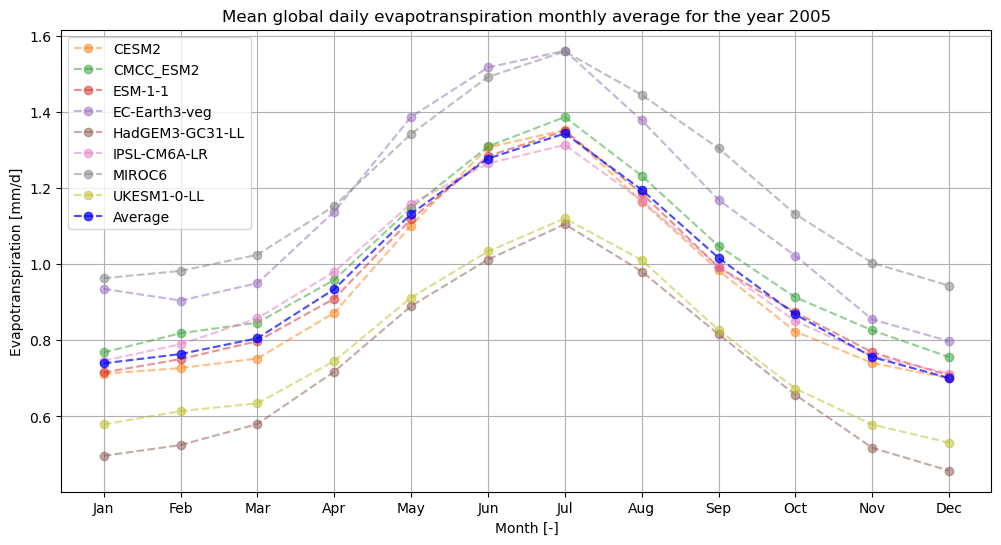

In [5]:
"""Plotting"""

DATA = [LM1_monthly_weighted_Ant , LM2_monthly_weighted_Ant , LM3_monthly_weighted_Ant , LM4_monthly_weighted_Ant , LM5_monthly_weighted_Ant ,
        LM6_monthly_weighted_Ant ,LM7_monthly_weighted_Ant ,LM8_monthly_weighted_Ant]



plt.figure(figsize = (12 ,6 ))
plt.title('Mean global daily evapotranspiration monthly average for the year 2005')

t = 144
m_py = 12

Color = ['C1o--' , 'C2o--' , 'C3o--' , 'C4o--' , 'C5o--' , 'C6o--' , 'C7o--' , 'C8o--']
Monthly_mean_2005 = np.zeros((8 , 12))

for j in range(8):
    for i in range(12):
         Monthly_mean_2005[j][i] = DATA[j][: , t - 8 * 12 + i , :].mean()
        
    plt.plot(np.arange(0 , 12 , 1) , Monthly_mean_2005[j] , Color[j] , alpha = 0.5 , label = Label[j]);
    
combined = np.zeros(12)

for i in range(12):
    combined[i] = Monthly_mean_2005[: , i].mean()

plt.plot(np.arange(0 , 12 , 1) , combined , 'bo--' , alpha = 0.7 , label = 'Average')
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.grid()
plt.legend()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]')

combined

In [6]:
print('The average monthly ET for all models after removing Antarctica:')
print(f'\n{combined}')

The average monthly ET for all models after removing Antarctica:

[0.73936235 0.76383703 0.80524444 0.93420175 1.13200567 1.27690143
 1.34300905 1.19517661 1.01639025 0.86765594 0.75593022 0.70068047]


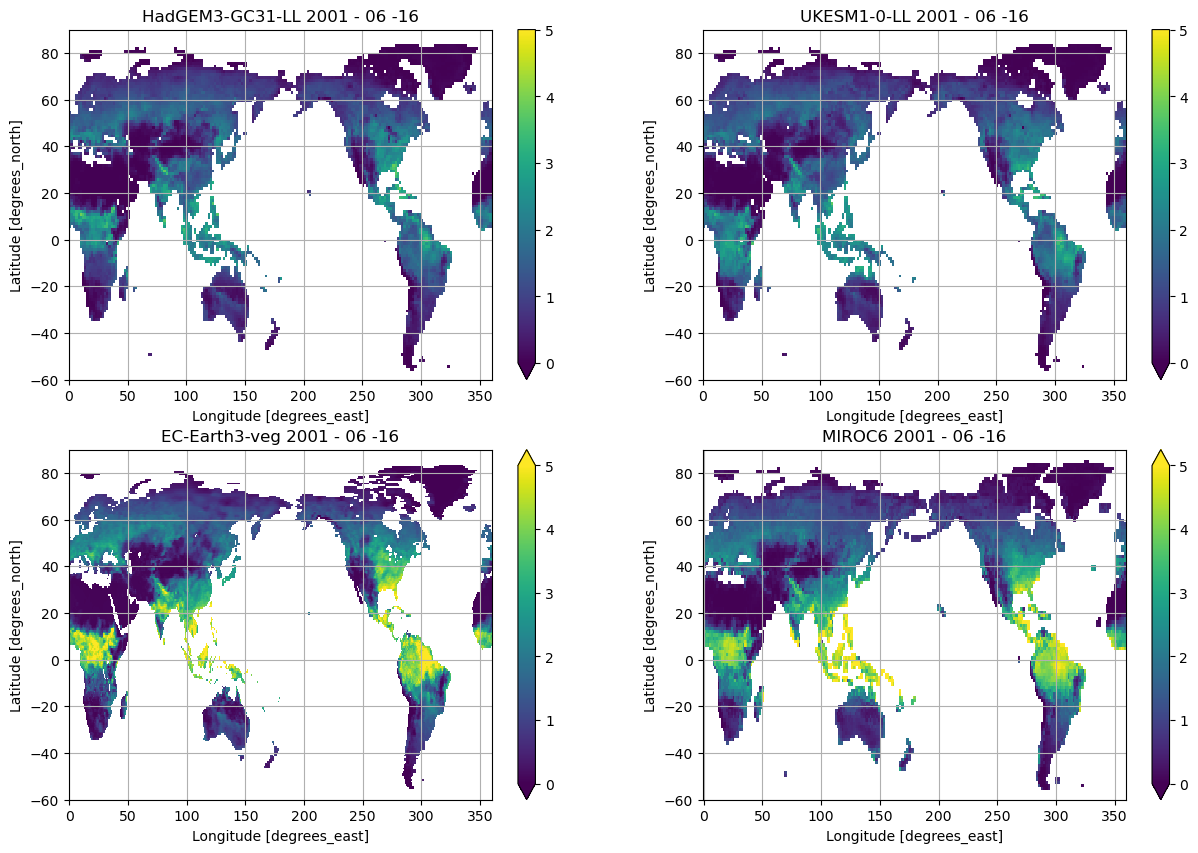

In [7]:
"""Looking at the highest and lowest LS3MIP averages"""

plt.figure(figsize = (15 , 10))

plt.subplot(221)
LM5_monthly_weighted_Ant[: , 5 , :].plot(cmap = 'viridis' , vmin = 0 , vmax = 5)
plt.ylim(-60 , 90)
plt.title(f'{Label[4]} 2001 - 06 -16')
plt.grid()

plt.subplot(222)
LM8_monthly_weighted_Ant[: , 5 , :].plot(cmap = 'viridis' , vmin = 0 , vmax = 5)
plt.ylim(-60 , 90)
plt.title(f'{Label[7]} 2001 - 06 -16')
plt.grid()

plt.subplot(223)
LM4_monthly_weighted_Ant[: , 5 , :].plot(cmap = 'viridis' , vmin = 0 , vmax = 5)
plt.ylim(-60 , 90)
plt.title(f'{Label[3]} 2001 - 06 -16')
plt.grid()

plt.subplot(224)
LM7_monthly_weighted_Ant[: , 5 , :].plot(cmap = 'viridis' , vmin = 0 , vmax = 5)
plt.title(f'{Label[6]} 2001 - 06 -16')
plt.ylim(-60 , 90)
plt.grid()

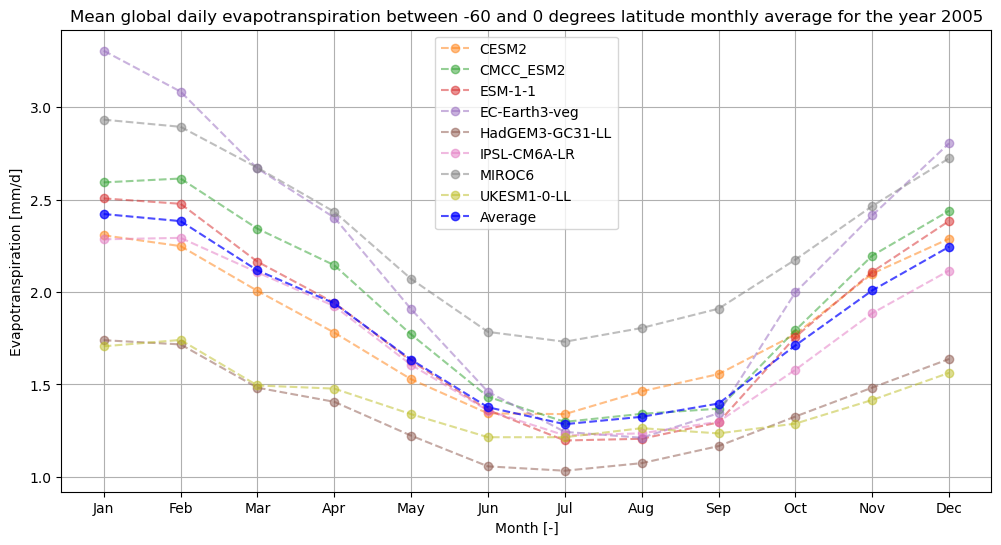

In [8]:
"""Plotting between -60 and 0 degrees latitude"""

DATA = [LM1_monthly_weighted_SH , LM2_monthly_weighted_SH , LM3_monthly_weighted_SH , LM4_monthly_weighted_SH , LM5_monthly_weighted_SH ,
        LM6_monthly_weighted_SH ,LM7_monthly_weighted_SH ,LM8_monthly_weighted_SH]

plt.figure(figsize = (12 ,6 ))
plt.title('Mean global daily evapotranspiration between -60 and 0 degrees latitude monthly average for the year 2005')

t = 144
m_py = 12

Color = ['C1o--' , 'C2o--' , 'C3o--' , 'C4o--' , 'C5o--' , 'C6o--' , 'C7o--' , 'C8o--']
Monthly_mean_2005 = np.zeros((8 , 12))

for j in range(8):
    for i in range(12):
        Monthly_mean_2005_kgm2s = DATA[j][: , t - 8 * 12 + i , :].mean()
        Monthly_mean_2005[j][i] = Monthly_mean_2005_kgm2s #converting to mm/d
    plt.plot(np.arange(0 , 12 , 1) , Monthly_mean_2005[j] , Color[j] , alpha = 0.5 , label = Label[j]);
    
Combined = np.zeros(12)

for i in range(12):
    Combined[i] = Monthly_mean_2005[: , i].mean()
    

plt.plot(np.arange(0 , 12 , 1) , Combined , 'bo--' , alpha = 0.7 , label = 'Average')
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.grid()
plt.legend()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]');

In [9]:
print('The average monthly ET for all models between -60 and 0 degrees latitude is eqaul to:')
print(f'\n{Combined}')

The average monthly ET for all models between -60 and 0 degrees latitude is eqaul to:

[2.42149499 2.38314347 2.11688883 1.93865722 1.63384697 1.37642622
 1.28491346 1.32481852 1.39656412 1.71100502 2.00840277 2.24439609]


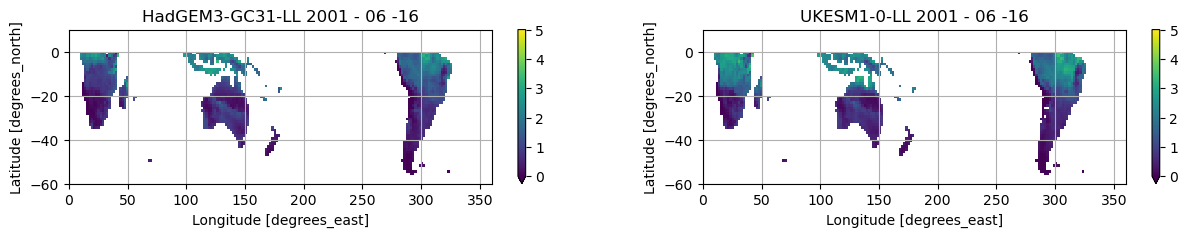

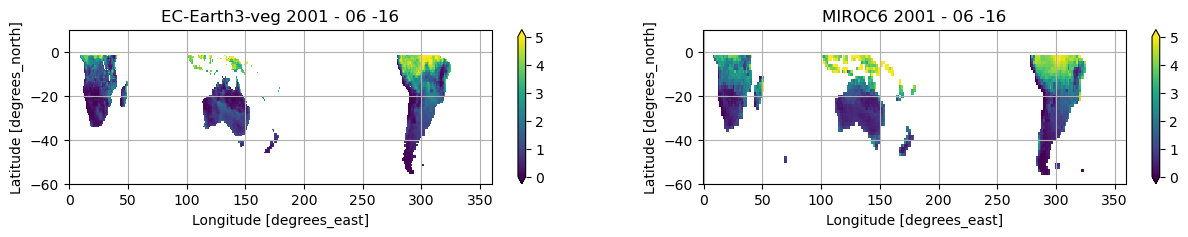

In [10]:
"""Looking at the highest and lowest LS3MIP averages"""

plt.figure(figsize = (15 , 2))

plt.subplot(121)
LM5_monthly_weighted_SH[: , 5 , :].plot(cmap = 'viridis' , vmin = 0 , vmax = 5)
plt.ylim(-60 , 10)
plt.title(f'{Label[4]} 2001 - 06 -16')
plt.grid()

plt.subplot(122)
LM8_monthly_weighted_SH[: , 5 , :].plot(cmap = 'viridis' , vmin = 0 , vmax = 5)
plt.ylim(-60 , 10)
plt.title(f'{Label[7]} 2001 - 06 -16')
plt.grid()

plt.figure(figsize = (15 , 2))

plt.subplot(121)
LM4_monthly_weighted_SH[: , 5 , :].plot(cmap = 'viridis' , vmin = 0 , vmax = 5)
plt.ylim(-60 , 10)
plt.title(f'{Label[3]} 2001 - 06 -16')
plt.grid()

plt.subplot(122)
LM7_monthly_weighted_SH[: , 5 , :].plot(cmap = 'viridis' , vmin = 0 , vmax = 5)
plt.title(f'{Label[6]} 2001 - 06 -16')
plt.ylim(-60 , 10)
plt.grid()


[0.7410731  0.77601545 0.82803495 0.94616374 1.09951546 1.26022647
 1.30875681 1.18479356 1.01613103 0.86502044 0.77465219 0.73061107]



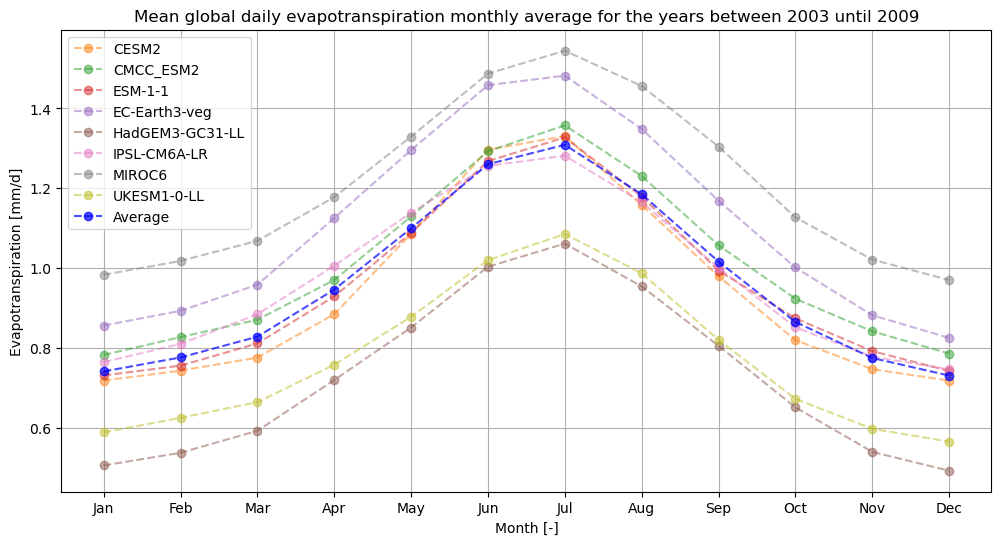

In [11]:
"""2003-2009"""

DATA = [LM1_monthly_weighted_Ant , LM2_monthly_weighted_Ant , LM3_monthly_weighted_Ant , LM4_monthly_weighted_Ant , LM5_monthly_weighted_Ant ,
        LM6_monthly_weighted_Ant ,LM7_monthly_weighted_Ant ,LM8_monthly_weighted_Ant]

plt.figure(figsize = (12 ,6 ))
plt.title('Mean global daily evapotranspiration monthly average for the years between 2003 until 2009')

t = 84
m_py = 12
n = 8 

Color = ['C1o--' , 'C2o--' , 'C3o--' , 'C4o--' , 'C5o--' , 'C6o--' , 'C7o--' , 'C8o--']

Monthly_mean_all = np.zeros((n , t))
Monthly_mean = np.zeros((n , m_py))
Combined = np.zeros(m_py)

for j in range(8):
    for i in range(t):
         Monthly_mean_all[j][i] = DATA[j][: , i + 2 * m_py , :].mean()
        
    
for j in range(8):
    for i in range(12):
        Monthly_mean[j][i] = np.mean([Monthly_mean_all[j][i] , Monthly_mean_all[j][i + 12] , Monthly_mean_all[j][i + 24] ,  Monthly_mean_all[j][i+36] , 
        Monthly_mean_all[j][i + 48] , Monthly_mean_all[j][i + 60] , Monthly_mean_all[j][i + 72]])
        Combined[i] = Monthly_mean[: , i].mean()
    plt.plot(np.arange(0 , m_py , 1) , Monthly_mean[j] , Color[j] , alpha = 0.5 , label = Label[j]);
    
plt.plot(np.arange(0 , 12 , 1) , Combined , 'bo--' , alpha = 0.7 , label = 'Average')
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.grid()
plt.legend()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]')

print()
print(Combined)
print()


[2.45214594 2.44890737 2.2705494  1.99089295 1.62018409 1.38166929
 1.27396047 1.3144154  1.43738251 1.70234503 2.05450182 2.29890827]



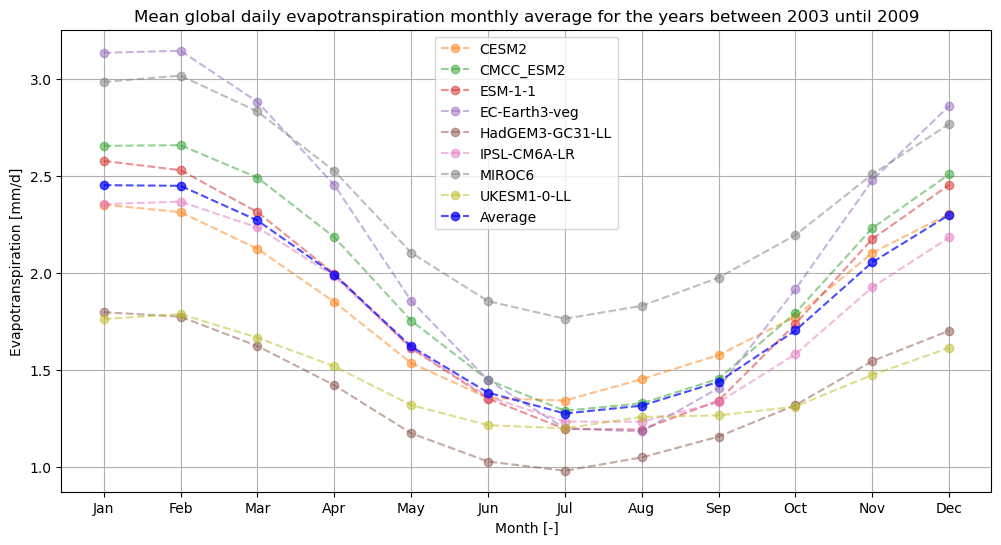

In [12]:
"""2003-2009 (between -60 and 0 degrees latitude)"""

DATA = [LM1_monthly_weighted_SH , LM2_monthly_weighted_SH , LM3_monthly_weighted_SH , LM4_monthly_weighted_SH , LM5_monthly_weighted_SH ,
        LM6_monthly_weighted_SH ,LM7_monthly_weighted_SH ,LM8_monthly_weighted_SH]

plt.figure(figsize = (12 ,6 ))
plt.title('Mean global daily evapotranspiration monthly average for the years between 2003 until 2009')

t = 84
m_py = 12
n = 8 

Color = ['C1o--' , 'C2o--' , 'C3o--' , 'C4o--' , 'C5o--' , 'C6o--' , 'C7o--' , 'C8o--']

Monthly_mean_all = np.zeros((n , t))
Monthly_mean = np.zeros((n , m_py))
Combined = np.zeros(m_py)

for j in range(8):
    for i in range(t):
         Monthly_mean_all[j][i] = DATA[j][: , i + 2 * m_py , :].mean()
        
    
for j in range(8):
    for i in range(12):
        Monthly_mean[j][i] = np.mean([Monthly_mean_all[j][i] , Monthly_mean_all[j][i + 12] , Monthly_mean_all[j][i + 24] ,  Monthly_mean_all[j][i+36] , 
        Monthly_mean_all[j][i + 48] , Monthly_mean_all[j][i + 60] , Monthly_mean_all[j][i + 72]])
        Combined[i] = Monthly_mean[: , i].mean()
    plt.plot(np.arange(0 , m_py , 1) , Monthly_mean[j] , Color[j] , alpha = 0.5 , label = Label[j]);
    
plt.plot(np.arange(0 , 12 , 1) , Combined , 'bo--' , alpha = 0.7 , label = 'Average')
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.grid()
plt.legend()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]')

print()
print(Combined)
print()


[22.9673553  21.94703952 25.8608371  28.40114187 34.10681123 37.81179493
 40.53190009 36.70512142 30.49453793 26.88049576 23.33738723 22.71017404]



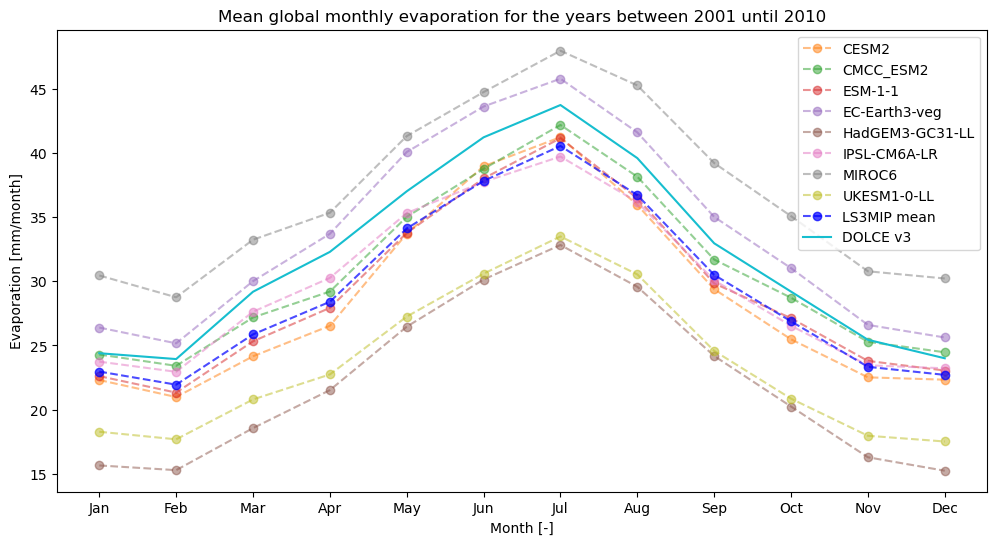

In [13]:
"""2001-2010"""

DATA = [LM1_monthly_weighted_Ant , LM2_monthly_weighted_Ant , LM3_monthly_weighted_Ant , LM4_monthly_weighted_Ant , LM5_monthly_weighted_Ant ,
        LM6_monthly_weighted_Ant ,LM7_monthly_weighted_Ant ,LM8_monthly_weighted_Ant]

plt.figure(figsize = (12 ,6 ))
plt.title('Mean global monthly evaporation for the years between 2001 until 2010')

t = 120
m_py = 12
n = 8 

Color = ['C1o--' , 'C2o--' , 'C3o--' , 'C4o--' , 'C5o--' , 'C6o--' , 'C7o--' , 'C8o--']

Monthly_mean_all = np.zeros((n , t))
Monthly_mean = np.zeros((n , m_py))
Combined = np.zeros(m_py)

dpm = [31, 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31]

for j in range(8):
    for i in range(t):
         Monthly_mean_all[j][i] = DATA[j][: , i  , :].mean() * dpm[i]
        
    
for j in range(8):
    for i in range(12):
        Monthly_mean[j][i] = np.mean([Monthly_mean_all[j][i] , Monthly_mean_all[j][i + 12] , Monthly_mean_all[j][i + 24] ,  Monthly_mean_all[j][i+36] , 
        Monthly_mean_all[j][i + 48] , Monthly_mean_all[j][i + 60] , Monthly_mean_all[j][i + 72] , Monthly_mean_all[j][i + 84] , 
        Monthly_mean_all[j][i + 96] , Monthly_mean_all[j][i + 108]])
        Combined[i] = Monthly_mean[: , i].mean()
    plt.plot(np.arange(0 , m_py , 1) , Monthly_mean[j] , Color[j] , alpha = 0.5 , label = Label[j]);
    
plt.plot(np.arange(0 , 12 , 1) , Combined , 'bo--' , alpha = 0.7 , label = 'LS3MIP mean')
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
#plt.grid()
plt.legend()
plt.xlabel('Month [-]')
plt.ylabel('Evaporation [mm/month]')

print()
print(Combined)
print()

"""DOLCE v3"""

DOLCE_v3_monthly_mean = np.zeros(12)
Monthly_mean_all_d = np.zeros(120)
number_m = np.arange(0 , 12 , 1)

for i in range(len(Monthly_mean_all_d)):
    Monthly_mean_all_d[i] = DOLCE_v3_monthly_weighted_Ant[: , i , :].mean() * dpm[i]

for i in number_m:
    DOLCE_v3_monthly_mean[i] = np.mean([Monthly_mean_all_d[i] , Monthly_mean_all_d[i + 12] , Monthly_mean_all_d[i + 24] ,  Monthly_mean_all_d[i+36] , 
    Monthly_mean_all_d[i + 48] , Monthly_mean_all_d[i + 60] , Monthly_mean_all_d[i + 72] , Monthly_mean_all_d[i + 84] , 
    Monthly_mean_all_d[i + 96] , Monthly_mean_all_d[i + 108]])
    
plt.plot(np.arange(0 , 12 , 1) , DOLCE_v3_monthly_mean , 'C9' , label = 'DOLCE v3')
plt.legend()

Some statistics of the monthly averages
--------------------------------------------------------------------------------------------------------------


,CESM2,CMCC-ESM2,ESM-1-1,EC-Earth3-veg,HadGEM3-GC31-LL,IPSL-CM6A-LR,MIROC6,UKESM1-0-LL
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,28.625755,30.692778,29.195836,33.711157,22.166327,29.731483,36.854288,23.525440
std,6.838298,6.188786,6.420742,7.220182,6.124090,5.932057,6.433084,5.497099
min,20.357341,22.863823,20.846544,24.367192,14.180263,22.090946,27.497992,16.463926
25%,22.567315,24.969429,23.542652,26.689642,16.050981,23.743356,30.646991,18.176864
50%,26.044918,28.954484,27.325067,31.910327,20.835379,28.853701,35.138113,21.946567
75%,34.866332,36.755084,35.314579,41.101464,27.920614,35.927598,43.011591,28.622914
max,42.067070,43.657796,41.944149,48.366833,34.248362,41.112774,49.944510,34.720285


--------------------------------------------------------------------------------------------------------------



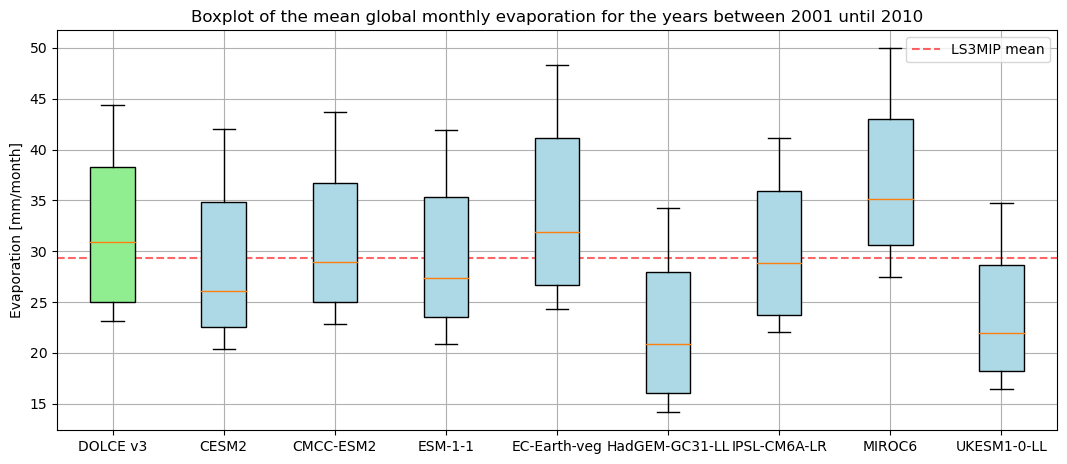

In [14]:
"""Boxplots"""

d = Monthly_mean_all

data = {'CESM2' : d[0] , 'CMCC-ESM2' : d[1] , 'ESM-1-1':d[2] , 'EC-Earth3-veg':d[3] , 'HadGEM3-GC31-LL':d[4] , 'IPSL-CM6A-LR':d[5] , 
        'MIROC6':d[6] , 'UKESM1-0-LL':d[7]}
data = pd.DataFrame(data = data)

print('Some statistics of the monthly averages')
print('-----' * 22)
display(data.describe())

data = [d[0] , d[1] , d[2] , d[3] , d[4] , d[5] , d[6] , d[7]] 
 
fig = plt.figure(figsize =(10, 4))
print('-----' * 22)
print()
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
plt.axhline(np.mean(d) , label = 'LS3MIP mean' , linestyle = 'dashed' , color = 'red' , alpha = 0.6)

bp = ax.boxplot(Monthly_mean_all_d , patch_artist = True , boxprops = dict(facecolor = 'lightgreen') , positions = [1] , widths = 0.4)
bp = ax.boxplot(data , patch_artist = True , boxprops = dict(facecolor = 'lightblue') , positions = [2 , 3 ,  4 , 5 , 6 , 7 , 8 , 9] , widths = 0.4)
ax.set_xticks([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9] , ['DOLCE v3' , 'CESM2' , 'CMCC-ESM2' , 'ESM-1-1' , 'EC-Earth-veg' , 'HadGEM-GC31-LL' , 'IPSL-CM6A-LR' , 
        'MIROC6' , 'UKESM1-0-LL'])
ax.set_ylabel('Evaporation [mm/month]')

ax.set_title('Boxplot of the mean global monthly evaporation for the years between 2001 until 2010')
# show plot
plt.grid()
plt.legend()
plt.show()


[76.31622894 69.63700354 71.28860218 60.06439201 50.52649668 41.34611422
 39.54930644 41.04277094 43.67691297 53.46646731 62.27002158 71.74982553]



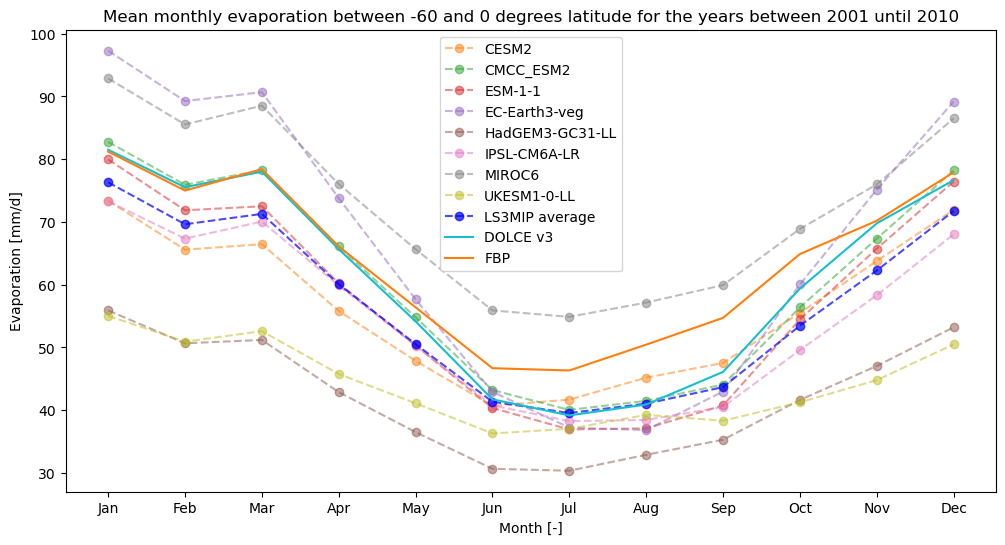

In [21]:
"""2001-2010 (Between -60 and 0 degrees latitude)"""

D = [LM1_monthly_weighted_SH , LM2_monthly_weighted_SH , LM3_monthly_weighted_SH , LM4_monthly_weighted_SH , LM5_monthly_weighted_SH ,
        LM6_monthly_weighted_SH ,LM7_monthly_weighted_SH ,LM8_monthly_weighted_SH]

plt.figure(figsize = (12 ,6 ))
plt.title('Mean monthly evaporation between -60 and 0 degrees latitude for the years between 2001 until 2010')

t = 120
m_py = 12
n = 8 

Color = ['C1o--' , 'C2o--' , 'C3o--' , 'C4o--' , 'C5o--' , 'C6o--' , 'C7o--' , 'C8o--']

Monthly_mean_all2 = np.zeros((n , t))
Monthly_mean = np.zeros((n , m_py))
Combined = np.zeros(m_py)

for j in range(8):
    for i in range(t):
         Monthly_mean_all2[j][i] = D[j][: , i  , :].mean() * dpm[i]
        
    
for j in range(8):
    for i in range(12):
        Monthly_mean[j][i] = np.mean([Monthly_mean_all2[j][i] , Monthly_mean_all2[j][i + 12] , Monthly_mean_all2[j][i + 24] ,  Monthly_mean_all2[j][i+36] , 
        Monthly_mean_all2[j][i + 48] , Monthly_mean_all2[j][i + 60] , Monthly_mean_all2[j][i + 72] , Monthly_mean_all2[j][i + 84] , 
        Monthly_mean_all2[j][i + 96] , Monthly_mean_all2[j][i + 108]])
        Combined[i] = Monthly_mean[: , i].mean()
    plt.plot(np.arange(0 , m_py , 1) , Monthly_mean[j] , Color[j] , alpha = 0.5 , label = Label[j]);
    
plt.plot(np.arange(0 , 12 , 1) , Combined , 'bo--' , alpha = 0.7 , label = 'LS3MIP average')
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])
plt.legend()
plt.xlabel('Month [-]')
plt.ylabel('Evaporation [mm/d]')

print()
print(Combined)
print()

"""DOLCE v3"""

DOLCE_v3_monthly_mean = np.zeros(12)
Monthly_mean_all_d = np.zeros(120)
number_m = np.arange(0 , 12 , 1)

for i in range(len(Monthly_mean_all_d)):
    Monthly_mean_all_d[i] = DOLCE_v3_monthly_weighted_SH[: , i , :].mean() * dpm[i]

for i in number_m:
    DOLCE_v3_monthly_mean[i] = np.mean([Monthly_mean_all_d[i] , Monthly_mean_all_d[i + 12] , Monthly_mean_all_d[i + 24] ,  Monthly_mean_all_d[i+36] , 
    Monthly_mean_all_d[i + 48] , Monthly_mean_all_d[i + 60] , Monthly_mean_all_d[i + 72] , Monthly_mean_all_d[i + 84] , 
    Monthly_mean_all_d[i + 96] , Monthly_mean_all_d[i + 108]])
    
plt.plot(np.arange(0 , 12 , 1) , DOLCE_v3_monthly_mean , 'C9' , label = 'DOLCE v3')

"""FBP"""

FBP_monthly_mean = np.zeros(12)
Monthly_mean_all_f = np.zeros(120)
number_m = np.arange(0 , 12 , 1)

for i in range(len(Monthly_mean_all_f)):
    Monthly_mean_all_f[i] = FBP_monthly_weighted_SH[: , i , :].mean() * dpm[i]

for i in number_m:
    FBP_monthly_mean[i] = np.mean([Monthly_mean_all_f[i] , Monthly_mean_all_f[i + 12] , Monthly_mean_all_f[i + 24] ,  Monthly_mean_all_f[i+36] , 
    Monthly_mean_all_f[i + 48] , Monthly_mean_all_f[i + 60] , Monthly_mean_all_f[i + 72] , Monthly_mean_all_f[i + 84] , 
    Monthly_mean_all_f[i + 96] , Monthly_mean_all_f[i + 108]])
    
plt.plot(np.arange(0 , 12 , 1) , FBP_monthly_mean , 'C11' , label = 'FBP')
plt.legend()

Some statistics of the monthly averages
--------------------------------------------------------------------------------------------------------------


,CESM2,CMCC-ESM2,ESM-1-1,EC-Earth3-veg,HadGEM3-GC31-LL,IPSL-CM6A-LR,MIROC6,UKESM1-0-LL
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,56.284231,60.715914,57.223856,66.088186,42.350054,54.563912,72.325968,44.403974
std,11.354333,15.572229,15.569510,21.991402,8.989114,12.871728,13.451302,6.517146
min,40.148280,38.221222,35.502464,34.903066,28.308385,36.858167,53.142576,34.935888
25%,46.404808,43.414736,40.734104,43.479635,33.872068,40.701847,58.607185,38.820782
50%,55.270952,61.861996,57.112515,67.629487,42.313903,54.736228,72.875422,43.002082
75%,66.503100,76.216951,72.201705,88.073034,50.826537,67.008680,85.351391,50.048335
max,76.031505,86.110289,82.979354,102.450193,58.303811,75.610275,95.753441,57.634921


--------------------------------------------------------------------------------------------------------------



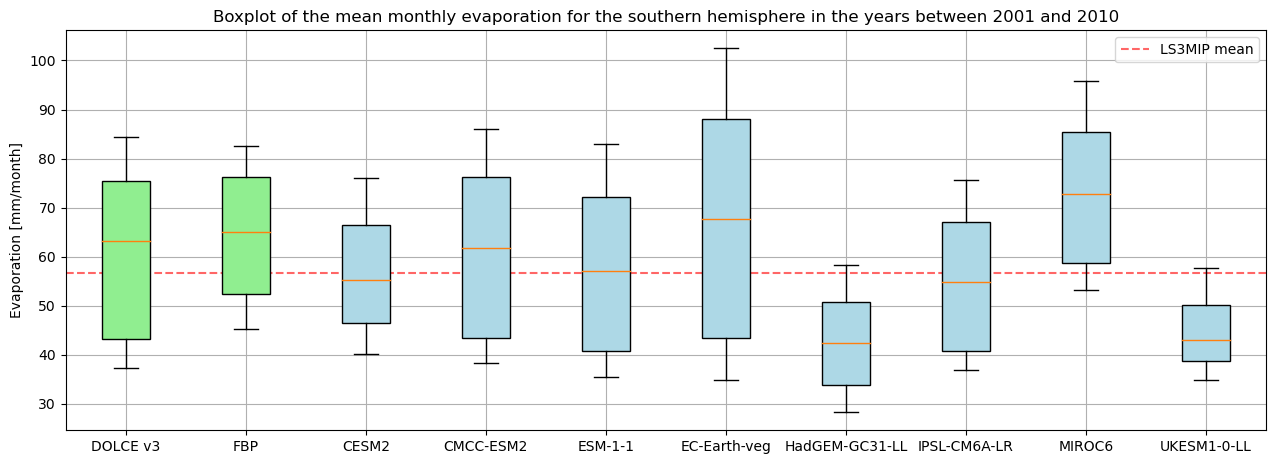

In [20]:
"""Boxplots"""

d = Monthly_mean_all2

data = {'CESM2' : d[0] , 'CMCC-ESM2' : d[1] , 'ESM-1-1':d[2] , 'EC-Earth3-veg':d[3] , 'HadGEM3-GC31-LL':d[4] , 'IPSL-CM6A-LR':d[5] , 
        'MIROC6':d[6] , 'UKESM1-0-LL':d[7]}
data = pd.DataFrame(data = data)

print('Some statistics of the monthly averages')
print('-----' * 22)
display(data.describe())

data = [d[0] , d[1] , d[2] , d[3] , d[4] , d[5] , d[6] , d[7]] 
 
fig = plt.figure(figsize =(12, 4))
print('-----' * 22)
print()
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
plt.axhline(np.mean(d) , label = 'LS3MIP mean' , linestyle = 'dashed' , color = 'red' , alpha = 0.6)

bp = ax.boxplot(Monthly_mean_all_d , patch_artist = True , boxprops = dict(facecolor = 'lightgreen') , positions = [1] , widths = 0.4)
bp = ax.boxplot(Monthly_mean_all_f , patch_artist = True , boxprops = dict(facecolor = 'lightgreen') , positions = [2] , widths = 0.4)
bp = ax.boxplot(data , patch_artist = True , boxprops = dict(facecolor = 'lightblue') , positions = [3 ,  4 , 5 , 6 , 7 , 8 , 9 , 10] , widths = 0.4)
ax.set_xticks([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10] , ['DOLCE v3', 'FBP' , 'CESM2' , 'CMCC-ESM2' , 'ESM-1-1' , 'EC-Earth-veg' , 'HadGEM-GC31-LL' , 'IPSL-CM6A-LR' , 
        'MIROC6' , 'UKESM1-0-LL'])
ax.set_ylabel('Evaporation [mm/month]')

ax.set_title('Boxplot of the mean monthly evaporation between -60 and 0 degrees latitude in the years between 2001 and 2010')
# show plot
plt.grid()
plt.legend()
plt.show()